In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import qqplot
from statsmodels.formula.api import ols #for linear regression
import seaborn as sns #for heatmap
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import scale 

In [2]:
data=pd.read_excel("education.xlsx") 

In [3]:
data.head()

,num,sup.help,sup.under,sup.safe,sup.conc,adv.comp,adv.acces,adv.comm,adv.qual,tut.prof,...,sat.glad,sat.expe,sat.over,loy.proud,loy.recom,loy.asha,loy.back,gender,scholarships,job
0,1,7,1,7,4,5,5,6,6,5,...,7,7,7,7,7,1,7,female,yes_scholship,no_job
1,2,7,1,6,4,6,6,5,6,6,...,7,7,7,7,7,1,7,female,yes_scholship,yes_job
2,3,6,1,6,6,6,6,6,6,6,...,7,6,6,7,7,1,7,female,yes_scholship,no_job
3,4,1,7,3,1,1,2,1,1,3,...,1,1,1,1,1,7,1,male,no_scholship,no_job
4,5,6,5,5,7,7,6,7,7,7,...,7,7,7,7,7,1,7,female,yes_scholship,yes_job


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
num             181 non-null int64
sup.help        181 non-null int64
sup.under       181 non-null int64
sup.safe        181 non-null int64
sup.conc        181 non-null int64
adv.comp        181 non-null int64
adv.acces       181 non-null int64
adv.comm        181 non-null int64
adv.qual        181 non-null int64
tut.prof        181 non-null int64
tut.sched       181 non-null int64
tut.stud        181 non-null int64
tut.qual        181 non-null int64
val.devel       181 non-null int64
val.deci        181 non-null int64
val.meet        181 non-null int64
val.info        181 non-null int64
sat.glad        181 non-null int64
sat.expe        181 non-null int64
sat.over        181 non-null int64
loy.proud       181 non-null int64
loy.recom       181 non-null int64
loy.asha        181 non-null int64
loy.back        181 non-null int64
gender          181 non-null object
scholarships    181

In [5]:
data.isnull().any()

num             False
sup.help        False
sup.under       False
sup.safe        False
sup.conc        False
adv.comp        False
adv.acces       False
adv.comm        False
adv.qual        False
tut.prof        False
tut.sched       False
tut.stud        False
tut.qual        False
val.devel       False
val.deci        False
val.meet        False
val.info        False
sat.glad        False
sat.expe        False
sat.over        False
loy.proud       False
loy.recom       False
loy.asha        False
loy.back        False
gender          False
scholarships    False
job             False
dtype: bool

In [6]:
data_numeric = data.select_dtypes(exclude="object")
data_object = data.select_dtypes(include="object")

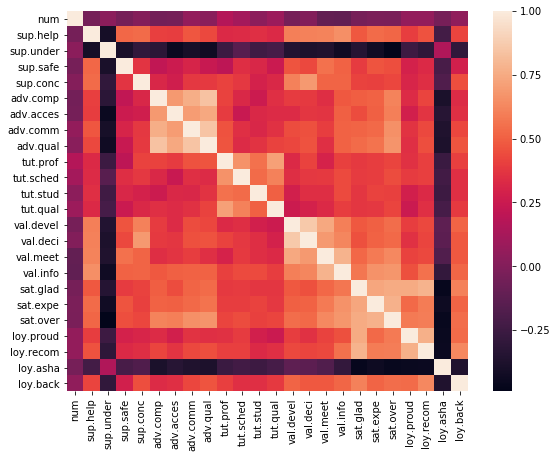

In [7]:
plt.figure(figsize=(9, 7)) #make the graph bigger
sns.heatmap(data_numeric.corr())
plt.show()

In [8]:
data_numeric.var()==0

num          False
sup.help     False
sup.under    False
sup.safe     False
sup.conc     False
adv.comp     False
adv.acces    False
adv.comm     False
adv.qual     False
tut.prof     False
tut.sched    False
tut.stud     False
tut.qual     False
val.devel    False
val.deci     False
val.meet     False
val.info     False
sat.glad     False
sat.expe     False
sat.over     False
loy.proud    False
loy.recom    False
loy.asha     False
loy.back     False
dtype: bool

In [9]:
for i in data_object.columns:
    print(data_object[i].unique())

['female' 'male']
['yes_scholship' 'no_scholship']
['no_job' 'yes_job']


In [10]:
data_dummy = pd.get_dummies(data_object,prefix=data_object.columns,drop_first=True)
data_dummy.head()

,gender_male,scholarships_yes_scholship,job_yes_job
0,0,1,0
1,0,1,1
2,0,1,0
3,1,0,0
4,0,1,1


In [11]:
data = data_numeric.join(data_dummy)

In [12]:
Y=data.loc[:,['sat.glad','sat.expe','sat.over']]
X=scale(data.drop(columns=['sat.glad','sat.expe','sat.over']))

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
num                           181 non-null int64
sup.help                      181 non-null int64
sup.under                     181 non-null int64
sup.safe                      181 non-null int64
sup.conc                      181 non-null int64
adv.comp                      181 non-null int64
adv.acces                     181 non-null int64
adv.comm                      181 non-null int64
adv.qual                      181 non-null int64
tut.prof                      181 non-null int64
tut.sched                     181 non-null int64
tut.stud                      181 non-null int64
tut.qual                      181 non-null int64
val.devel                     181 non-null int64
val.deci                      181 non-null int64
val.meet                      181 non-null int64
val.info                      181 non-null int64
sat.glad                      181 non-null int64
sat.expe     

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [15]:
pls = PLSRegression(14)
pls=pls.fit(x_train,y_train)

In [16]:
pred=pls.predict(x_test)

In [17]:
#R-square
pls_r2=pls.score(x_test,y_test)
print(pls_r2)

0.38413369003626363


In [18]:
coef=pd.DataFrame(pls.coef_)
coef.head()

,0,1,2
0,-0.095599,-0.010807,0.012933
1,-0.076896,-0.019347,-0.076226
2,-0.020262,-0.097420,-0.042291
3,0.040228,0.099126,0.039291
4,0.085048,0.083204,0.006258


In [19]:
sc=pd.DataFrame(pls.x_scores_)
sc.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.857638,0.133764,0.853618,-0.100318,-1.185610,0.248376,0.063070,-1.108548,-0.755446,-0.356219,0.253866,0.140257,-0.065964,0.476023
1,2.415631,0.042520,-0.115469,-1.361089,-0.093698,0.744205,-1.260321,-0.347833,-0.637110,-0.469920,0.141148,-0.208698,-0.172560,-0.757264
2,2.945618,-0.957652,0.682871,-0.474348,1.006220,-0.716889,-0.076299,0.151221,0.293680,0.349724,1.108010,0.505187,0.145707,0.310175
3,-7.859322,-1.977142,-0.105344,0.851490,-0.547091,0.052130,-0.211254,0.090682,-0.282570,0.690123,0.507285,-0.119420,0.223559,1.112185
4,-1.926817,1.610129,0.058334,-1.839356,-0.827321,-1.215046,1.002554,1.222161,-0.252264,-0.754077,0.645667,0.628390,-0.113929,0.928457
5,-2.733119,1.307467,1.299109,-1.056002,0.360008,0.083702,0.254735,-0.800398,-1.484346,0.680573,0.994766,0.064882,1.010613,0.016595
6,1.800679,0.058056,0.641305,1.393090,0.148011,0.536589,0.371035,-0.368013,0.300851,-0.887589,-0.557356,-0.161247,0.517732,0.557692
7,1.104821,-0.036885,1.469941,-0.487139,-0.534424,-1.005593,1.848469,-0.016477,-0.368723,0.451757,-0.122262,0.394535,-0.088417,-0.476425
8,-2.846298,-0.021633,0.315441,-0.171007,-0.229715,1.008104,-0.846424,0.953826,-0.516247,-1.104426,-1.096538,-0.646511,-0.386780,-0.005741
9,0.831954,-0.035521,-0.669536,1.911785,-1.591215,-0.272532,0.138596,0.456388,0.510611,0.680563,-0.921015,0.353841,0.452556,0.038058


In [20]:
var_xcores=np.var(pls.x_scores_,axis=0)
print(var_xcores)

[9.2525381  1.23121137 1.34089609 1.08137006 0.79987243 0.85824961
 0.68189272 0.5069814  0.55528937 0.55930164 0.43866701 0.43160934
 0.26798586 0.32060981]


In [21]:
total_var=np.sum(np.var(x_train,axis=0))
print(total_var)

25.07465087249158


In [22]:
X_Variance=pd.DataFrame((var_xcores/total_var).round(3), columns={"X_Variance"}).reset_index()

In [23]:
X_Variance = X_Variance.rename(columns={'index': 'Latent_Factors'})
X_Variance['Cummulative_X_Variance'] = X_Variance['X_Variance'].cumsum().round(3) #calculates cummulative variance
print(X_Variance)

    Latent_Factors  X_Variance  Cummulative_X_Variance
0                0       0.369                   0.369
1                1       0.049                   0.418
2                2       0.053                   0.471
3                3       0.043                   0.514
4                4       0.032                   0.546
5                5       0.034                   0.580
6                6       0.027                   0.607
7                7       0.020                   0.627
8                8       0.022                   0.649
9                9       0.022                   0.671
10              10       0.017                   0.688
11              11       0.017                   0.705
12              12       0.011                   0.716
13              13       0.013                   0.729


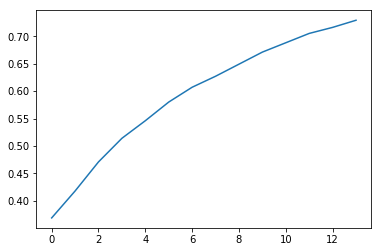

In [24]:
plt.plot(X_Variance.Latent_Factors,X_Variance.Cummulative_X_Variance)
plt.show()

In [67]:
pls = PLSRegression(12)
pls=pls.fit(x_train,y_train)

In [68]:
pred=pls.predict(x_test)
pls_r2=pls.score(x_test,y_test)
print(pls_r2)

0.38835863643440255


In [69]:
var_xcores=np.var(pls.x_scores_,axis=0)
print(var_xcores)
total_var=np.sum(np.var(x_train,axis=0))
print(total_var)

[9.2525381  1.23121137 1.34089609 1.08137006 0.79987243 0.85824961
 0.68189272 0.5069814  0.55528937 0.55930164 0.43866701 0.43160934]
25.07465087249158


In [70]:
X_Variance=pd.DataFrame((var_xcores/total_var).round(3), columns={"X_Variance"}).reset_index()
X_Variance = X_Variance.rename(columns={'index': 'Latent_Factors'})
X_Variance['Cummulative_X_Variance'] = X_Variance['X_Variance'].cumsum().round(3) #calculates cummulative variance
print(X_Variance)

    Latent_Factors  X_Variance  Cummulative_X_Variance
0                0       0.369                   0.369
1                1       0.049                   0.418
2                2       0.053                   0.471
3                3       0.043                   0.514
4                4       0.032                   0.546
5                5       0.034                   0.580
6                6       0.027                   0.607
7                7       0.020                   0.627
8                8       0.022                   0.649
9                9       0.022                   0.671
10              10       0.017                   0.688
11              11       0.017                   0.705


# Linear Regression

In [25]:
lin_reg=LinearRegression().fit(X,Y)
pr_l=lin_reg.predict(x_test)
Linear_r2=r2_score(y_test,pr_l)
print(Linear_r2)

0.5890058794716073


In [26]:
print(pls_r2,Linear_r2)

0.38413369003626363 0.5890058794716073
